In [3]:
import numpy as np
from scipy.stats import laplace

def laplaceMechCount(true_count, epsilon):
    sensitivity = 1
    scale = sensitivity / epsilon
    noise = laplace.rvs(scale=scale)
    return true_count + noise

In [4]:
true_count = 500
epsilon_values = [10, 1, 0.1, 0.01]
num_trials = 100

noisy_counts = []

for eps in epsilon_values:
    noisy_counts_eps = []
    for i in range(num_trials):
        noisy_count = laplaceMechCount(true_count, eps)
        noisy_counts_eps.append(noisy_count)
    noisy_counts.append(noisy_counts_eps)


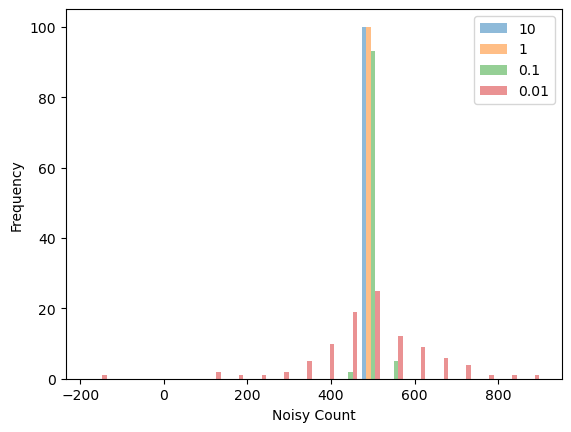

In [5]:
import matplotlib.pyplot as plt

plt.hist(noisy_counts, bins=20, alpha=0.5, label=[str(eps) for eps in epsilon_values])
plt.legend()
plt.xlabel('Noisy Count')
plt.ylabel('Frequency')
plt.show()


In [6]:
for i, eps in enumerate(epsilon_values):
    print('Epsilon =', eps)
    print('True Count =', true_count)
    print('Mean of Noisy Counts =', np.mean(noisy_counts[i]))
    print('Standard Deviation of Noisy Counts =', np.std(noisy_counts[i]))
    print()

Epsilon = 10
True Count = 500
Mean of Noisy Counts = 499.98083306432983
Standard Deviation of Noisy Counts = 0.13923322624656084

Epsilon = 1
True Count = 500
Mean of Noisy Counts = 499.9251496190123
Standard Deviation of Noisy Counts = 1.1465825493004

Epsilon = 0.1
True Count = 500
Mean of Noisy Counts = 499.7114288051292
Standard Deviation of Noisy Counts = 14.774906877981673

Epsilon = 0.01
True Count = 500
Mean of Noisy Counts = 485.8619726245868
Standard Deviation of Noisy Counts = 146.13568842707576



In [94]:
def laplaceMechMean(data, epsilon, r_min, r_max):
    n = len(data)
    mean = np.mean(data)
    r1 = sum(data)-r_min
    r2 = sum(data)-r_max
    sensitivity = abs((r2-r1) / (n - 1 - mean))
    scale = sensitivity / epsilon
    if scale < 0:
        print("uh oh")
        print("sum:"+str(sum(data)))
        print("r_min:"+str(r_min))
        print("r_max:"+str(r_max))
        print("n:"+str(n))
        print("mean:"+str(mean))
        
    noise = np.random.laplace(loc=0.0, scale=scale)
    return mean + noise


100


/var/folders/2j/_zfm4bxj0cl90wmtwhzby29h0000gn/T/ipykernel_67409/3942186352.py:6: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity = abs((r2-r1) / (n - 1 - mean))


10


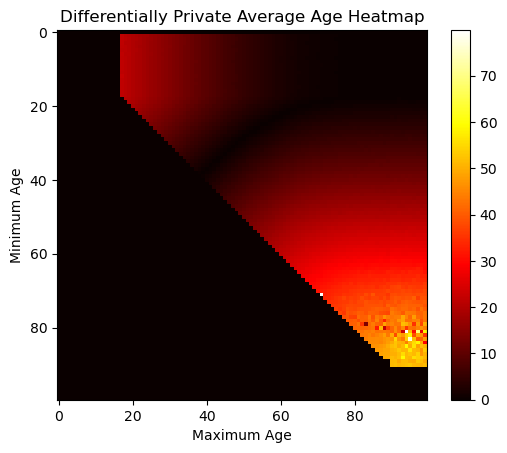

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import laplace
import pandas as pd

# Load the income dataset
income_data = pd.read_csv("income.csv")
6
# Set bounds for age
min_age = 1
max_age = 100

# Set epsilon value
epsilon = 0.1

# Create heatmap grid
grid = np.zeros((max_age - min_age + 1, max_age - min_age + 1))
print(max_age - min_age + 1)

# Compute the true mean age
true_mean_age = income_data['age'].mean()

# Compute Laplace noise for each point in the grid and record the difference from the true mean
for i in range(min_age, max_age):
    for j in range(i, max_age):
        data = income_data[(income_data['age'] >= i) & (income_data['age'] <= j)]
        if(len(data)==0):
            continue
        noisy_age_range_mean = laplaceMechMean(data['age'], epsilon, i, j)
        grid[i][j] = abs(noisy_age_range_mean - true_mean_age)

        
print(10)
# Plot the heatmap
plt.imshow(grid, cmap='hot', interpolation='nearest')
plt.title("Differentially Private Average Age Heatmap")
plt.xlabel("Maximum Age")
plt.ylabel("Minimum Age")
plt.colorbar()
plt.show()
